<a href="https://colab.research.google.com/github/ayertey01/MachineLearning-Project/blob/main/AthleteModules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
teams = pd.read_csv('teams.csv')
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [2]:
teams= teams[["team","country","year","events","athletes","age","prev_medals","medals"]]
teams


,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [3]:
teams.corr()["medals"]

year          -0.021603
events         0.771330
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [4]:
#corr(), used to find correlations in this case with medals
#this is very import as it gives you an idea on which variable is most closes to being a suitable match from the data.

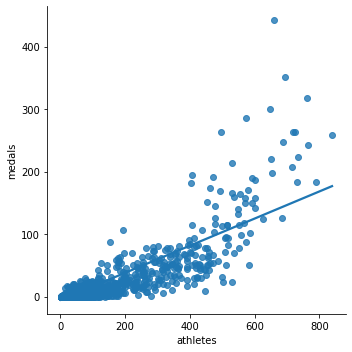

In [5]:
import seaborn as sns
sns.lmplot(x="athletes",y="medals", data=teams,fit_reg=True,ci=None)

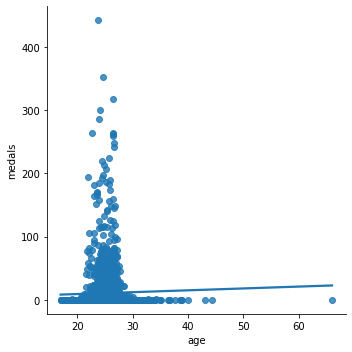

In [6]:
bait= sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

In [7]:
#from the corr() function it was not necessary to plot the graph with age since there was a lower correlations with medals.

In [8]:
# Hence the reason for no linear relationship.

<AxesSubplot:ylabel='Frequency'>

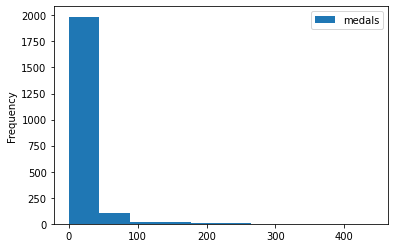

In [9]:
teams.plot.hist(y="medals")

In [10]:
teams[teams.isna().any(axis=1)]

,team,country,year,events,athletes,age,prev_medals,medals
19,ALB,Albania,1992,8,9,25.3,NaN,0
26,ALG,Algeria,1964,7,7,26.0,NaN,0
39,AND,Andorra,1976,2,3,28.3,NaN,0
50,ANG,Angola,1980,14,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,11,17,23.2,NaN,0
...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,5,23.6,NaN,0


In [11]:
teams=teams.dropna()

In [12]:
teams

,team,country,year,events,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,0.0,0
...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,15,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0


In [13]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [14]:
train.shape



(1609, 8)

In [15]:
test.shape

(405, 8)

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [17]:
predictors=["athletes","prev_medals"]
target=["medals"]


In [18]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [19]:
predictions=reg.predict(test[predictors])

In [20]:
#note that we used the predict method in this case 

In [21]:
predictions

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [22]:
test["predictions"]=predictions

In [23]:
test.loc[test["predictions"]<0,"predictions"]=0

In [24]:
test["predictions"]=test["predictions"].round()

In [25]:
test

,team,country,year,events,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,9,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,29,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,4.0,0,2.0


In [26]:
from sklearn.metrics import mean_absolute_error
error= mean_absolute_error(test["medals"],test["predictions"])
error

3.2987654320987656

In [27]:
#this is used in determining the margin of error for all predictions +/-

In [28]:
#checking sanity of of the prediction, for that we amke sure the error in this case is not more than the std(standard deviation) 

In [29]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [30]:
#now we check how the predictions did

In [31]:
test[test["team"]=="AFG"]

,team,country,year,events,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,3,24.7,1.0,0,0.0


In [32]:
#this is done by comparing the medals columns to the predictions columns